In [32]:
import matplotlib.pylab as plt

In [57]:
import numpy as np
import random
import time
import gym
from gym import wrappers

def run_episode(env, policy, episode_len=100):
    total_reward = 0
    obs = env.reset()
    for t in range(episode_len):
        # env.render()
        action = policy[obs]
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            # print('Epside finished after {} timesteps.'.format(t+1))
            break
    return total_reward


def evaluate_policy(env, policy, n_episodes=100):
    total_rewards = 0.0
    for _ in range(n_episodes):
        total_rewards += run_episode(env, policy)
    return total_rewards / n_episodes

def gen_random_policy():
    return np.random.choice(4, size=((16)))

def crossover(policy1, policy2):
    new_policy = policy1.copy()
    for i in range(16):
        rand = np.random.uniform()
        if rand > 0.5:
            new_policy[i] = policy2[i]
    return new_policy

def mutation(policy, p):
    new_policy = policy.copy()
    for i in range(16):
        rand = np.random.uniform()
        if rand < p:
            new_policy[i] = np.random.choice(4)
    return new_policy

def run(n_steps):
    random.seed(1234)
    np.random.seed(1234)
    env = gym.make('FrozenLake-v0')
    env.seed(0)
    # env = wrappers.Monitor(env, '/tmp/frozenlake1', force=True)
    ## Policy search
    p_mut = 0.05 
    n_policy = 30
    start = time.time()
    policy_pop = [gen_random_policy() for _ in range(n_policy)]
    for idx in range(n_steps):
        policy_scores = [evaluate_policy(env, p) for p in policy_pop]
        print('Generation %d : max score = %0.2f' %(idx+1, max(policy_scores)))
        policy_ranks = list(reversed(np.argsort(policy_scores)))
        elite_set = [policy_pop[x] for x in policy_ranks[:5]] #take the 5 best policy
        select_probs = np.array(policy_scores) / np.sum(policy_scores)
        child_set = [crossover(
            policy_pop[np.random.choice(range(n_policy), p=select_probs)], 
            policy_pop[np.random.choice(range(n_policy), p=select_probs)])
            for _ in range(n_policy - 5)]
        mutated_list = [mutation(p, p_mut) for p in child_set]
        policy_pop = elite_set
        policy_pop += mutated_list
    policy_score = [evaluate_policy(env, p) for p in policy_pop]
    best_policy = policy_pop[np.argmax(policy_score)]

    end = time.time()
    print('Best policy score = %0.2f. Time taken = %4.4f'
            %(np.max(policy_score), (end-start)))    
    return np.max(policy_score)
    ## Evaluation
   

In [39]:
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
y = [run(p) for p in x]

Generation 1 : max score = 0.20
Generation 2 : max score = 0.28
Generation 3 : max score = 0.39
Generation 4 : max score = 0.44
Generation 5 : max score = 0.71
Generation 6 : max score = 0.68
Generation 7 : max score = 0.76
Generation 8 : max score = 0.82
Generation 9 : max score = 0.84
Generation 10 : max score = 0.82
Best policy score = 0.81. Time taken = 22.0112
Generation 1 : max score = 0.20
Generation 2 : max score = 0.30
Generation 3 : max score = 0.60
Generation 4 : max score = 0.66
Generation 5 : max score = 0.79
Generation 6 : max score = 0.84
Generation 7 : max score = 0.80
Generation 8 : max score = 0.78
Generation 9 : max score = 0.79
Generation 10 : max score = 0.80
Best policy score = 0.80. Time taken = 23.2051
Generation 1 : max score = 0.20
Generation 2 : max score = 0.22
Generation 3 : max score = 0.44
Generation 4 : max score = 0.51
Generation 5 : max score = 0.74
Generation 6 : max score = 0.72
Generation 7 : max score = 0.78
Generation 8 : max score = 0.73
Generati

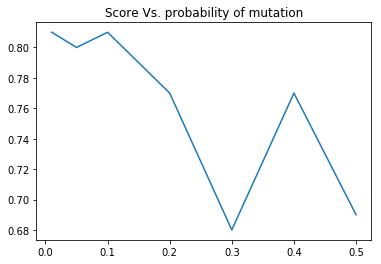

In [60]:
plt.plot(x, y)
plt.title("Score Vs. probability of mutation")
plt.savefig("p_mutation")

In [53]:
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1 = [run(n) for n in x1]

Generation 1 : max score = 0.04
Generation 2 : max score = 0.11
Generation 3 : max score = 0.10
Generation 4 : max score = 0.11
Generation 5 : max score = 0.31
Generation 6 : max score = 0.21
Generation 7 : max score = 0.44
Generation 8 : max score = 0.37
Generation 9 : max score = 0.51
Generation 10 : max score = 0.51
Best policy score = 0.56. Time taken = 1.7074
Generation 1 : max score = 0.12
Generation 2 : max score = 0.14
Generation 3 : max score = 0.22
Generation 4 : max score = 0.19
Generation 5 : max score = 0.23
Generation 6 : max score = 0.19
Generation 7 : max score = 0.32
Generation 8 : max score = 0.35
Generation 9 : max score = 0.42
Generation 10 : max score = 0.40
Best policy score = 0.55. Time taken = 2.8304
Generation 1 : max score = 0.12
Generation 2 : max score = 0.15
Generation 3 : max score = 0.16
Generation 4 : max score = 0.29
Generation 5 : max score = 0.72
Generation 6 : max score = 0.79
Generation 7 : max score = 0.76
Generation 8 : max score = 0.78
Generation

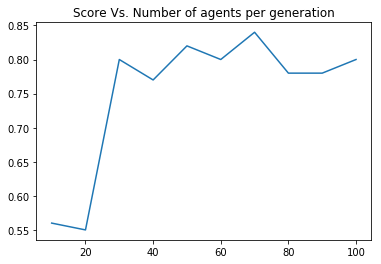

In [56]:
plt.plot(x1, y1)
plt.title("Score Vs. Number of agents per generation")
plt.savefig("agent_per_gen")

In [58]:
x2 = [i for i in np.arange(0,20,2)]
y2 = [run(n) for n in x2]

Best policy score = 0.12. Time taken = 0.2822
Generation 1 : max score = 0.12
Generation 2 : max score = 0.15
Best policy score = 0.16. Time taken = 0.8657
Generation 1 : max score = 0.12
Generation 2 : max score = 0.15
Generation 3 : max score = 0.16
Generation 4 : max score = 0.29
Best policy score = 0.72. Time taken = 1.5239
Generation 1 : max score = 0.12
Generation 2 : max score = 0.15
Generation 3 : max score = 0.16
Generation 4 : max score = 0.29
Generation 5 : max score = 0.72
Generation 6 : max score = 0.79
Best policy score = 0.76. Time taken = 2.8015
Generation 1 : max score = 0.12
Generation 2 : max score = 0.15
Generation 3 : max score = 0.16
Generation 4 : max score = 0.29
Generation 5 : max score = 0.72
Generation 6 : max score = 0.79
Generation 7 : max score = 0.76
Generation 8 : max score = 0.78
Best policy score = 0.80. Time taken = 4.1609
Generation 1 : max score = 0.12
Generation 2 : max score = 0.15
Generation 3 : max score = 0.16
Generation 4 : max score = 0.29
Ge

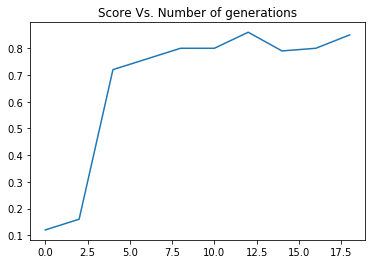

In [59]:
plt.plot(x2, y2)
plt.title("Score Vs. Number of generations")
plt.savefig("n_gen")

In [ ]:
 env = wrappers.Monitor(env, '/tmp/frozenlake1', force=True)
    for _ in range(200):
        run_episode(env, best_policy)
    env.close()
    gym.upload('/tmp/frozenlake1', api_key=...)